# The question is whether we could see signs of the sudden rise in share prices ?
# or is it a kind of black swan ?

In [1]:
# Import librairies
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 9]
plt.rcParams['lines.linewidth'] = 1

# Importing the data

In [2]:
# Load the data
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-21,2020-01-21,530.250000,548.580017,528.409973,547.200012,547.200012,17803500
2020-01-22,2020-01-22,571.890015,594.500000,559.099976,569.559998,569.559998,31369000
2020-01-23,2020-01-23,564.250000,582.000000,555.599976,572.200012,572.200012,19651000
2020-01-24,2020-01-24,570.630005,573.859985,554.260010,564.820007,564.820007,14353600
2020-01-27,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


# First look at the shape and at the trend of the data (close & volume)

> Build a rolling windows of 20/100 days and plot the mean on this windows

ConversionError: Failed to convert value(s) to axis units: '2019-12-19'

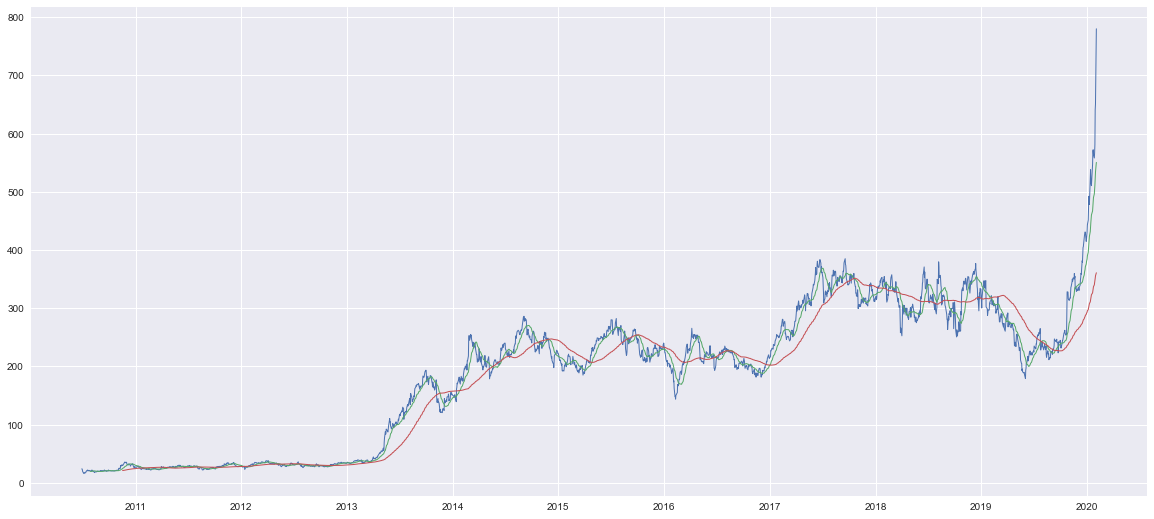

In [3]:
def plot_with_rolling(data,short_rolling,long_rolling,lbl='Close Price'):
    # Plot 
    fig, ax = plt.subplots(figsize=(20,9))

    ax.plot(data.index, data, label=lbl)
    ax.plot(short_rolling.index, short_rolling, label='20 days rolling')
    ax.plot(long_rolling.index, long_rolling, label='100 days rolling')
    ax.axvline(x='2019-12-19',linewidth=0.8, color='r')
    ax.axvline(x='2019-06-01',linewidth=0.8, color='g')
    ax.set_xlabel('Date')
    ax.set_ylabel(lbl)
    ax.legend()

    plt.show()

short = df.Close.rolling(window=20).mean()
long = df.Close.rolling(window=100).mean() 
plot_with_rolling(data=df.Close,short_rolling=short,long_rolling=long,lbl='Close Price')    
    
short = df.Close[df.index>'2018-12-21'].rolling(window=20).mean()
long = df.Close[df.index>'2018-12-21'].rolling(window=100).mean() 
plot_with_rolling(data=df.Close[df.index>'2018-12-21'],short_rolling=short,long_rolling=long,lbl='Close Price')

> <span>&#171;</span>The trend was really bullish since June, which is remarkable is perhaps the slope of the moving average 20 during the last months before our end point (2019-12-19)<span>&#187;</span>

> <span>&#171;</span>On the zoom, we see that the rise is very powerful after the beginning of september, the MA100 has absorded the decrease of the past and follow the MA20 <span>&#187;</span>

ConversionError: Failed to convert value(s) to axis units: '2019-12-19'

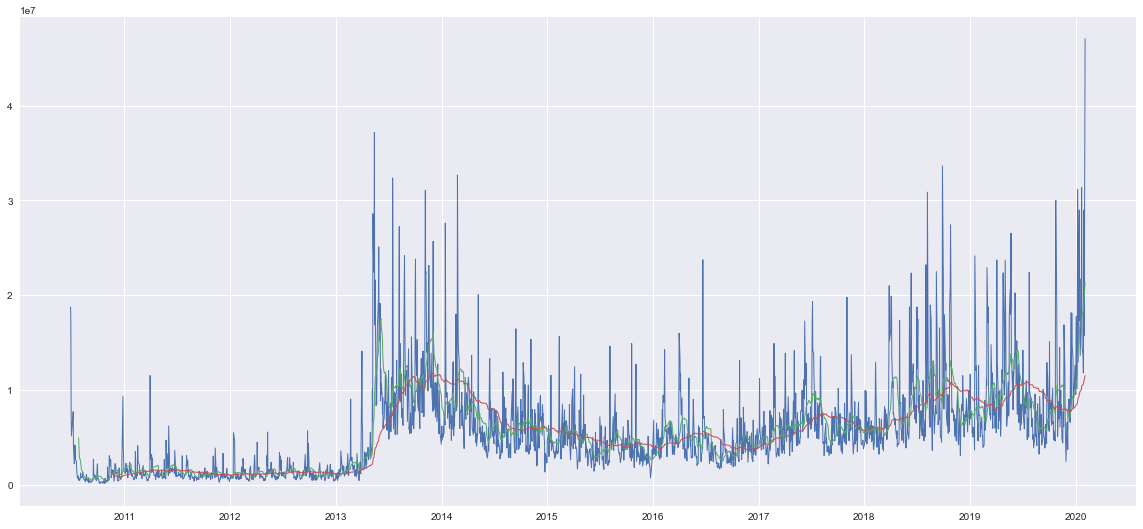

In [4]:
short = df.Volume.rolling(window=20).mean()
long = df.Volume.rolling(window=100).mean()
plot_with_rolling(data=df.Volume,short_rolling=short,long_rolling=long,lbl='Volume')    
    
short = df.Volume[df.index>'2018-12-21'].rolling(window=20).mean()
long = df.Volume[df.index>'2018-12-21'].rolling(window=100).mean() 
plot_with_rolling(data=df.Volume[df.index>'2018-12-21'],short_rolling=short,long_rolling=long,lbl='Volume')


> <span>&#171;</span>Volume are not exceptionally high before our end point (2019-12-19),<br/> but volumes are constantly very high over the year 2019<span>&#187;</span>

# Calculate the daily returns

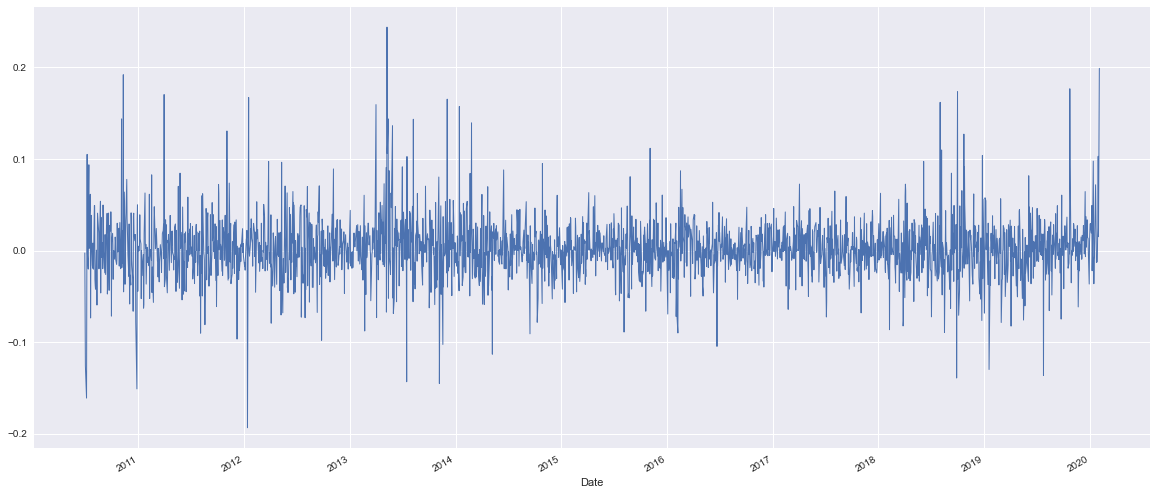

In [5]:
# Calculate the daily return and the daily log return
daily_rtn = df.Close/df.Close.shift(1) - 1
daily_log_rtn = np.log(df.Close).diff()
# Calculate the daily return (another way)
# daily_rtn = close.pct_change(1)

daily_rtn.plot()
plt.show()
# log return


> <span>&#171;</span>Nothing to say ... <span>&#187;</span>

# The variance of the close and of the volume


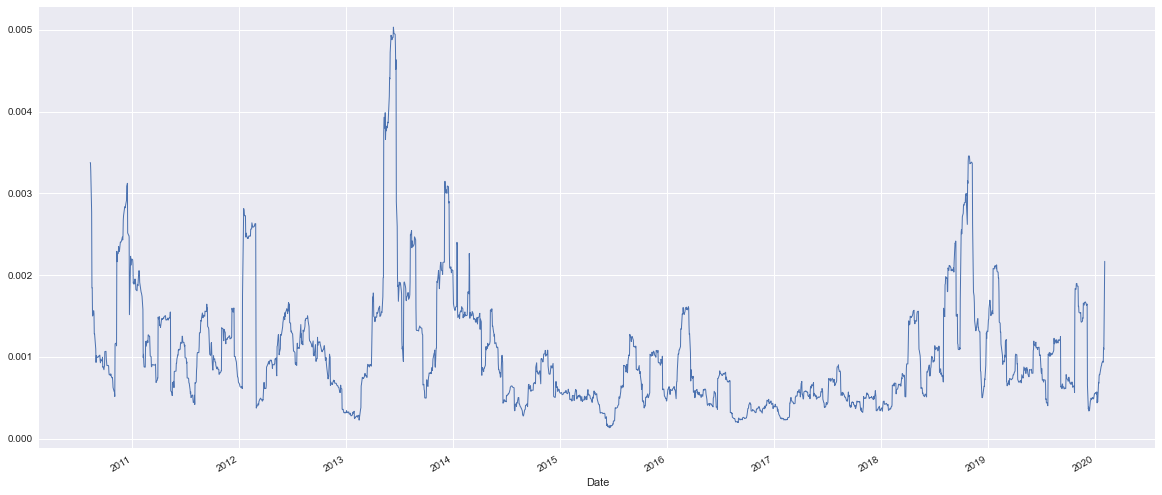

In [6]:
daily_rtn.rolling(30).var().plot()
plt.show()

> <span>&#171;</span>There is no spike of variance of the daily returns before the rise<span>&#187;</span>

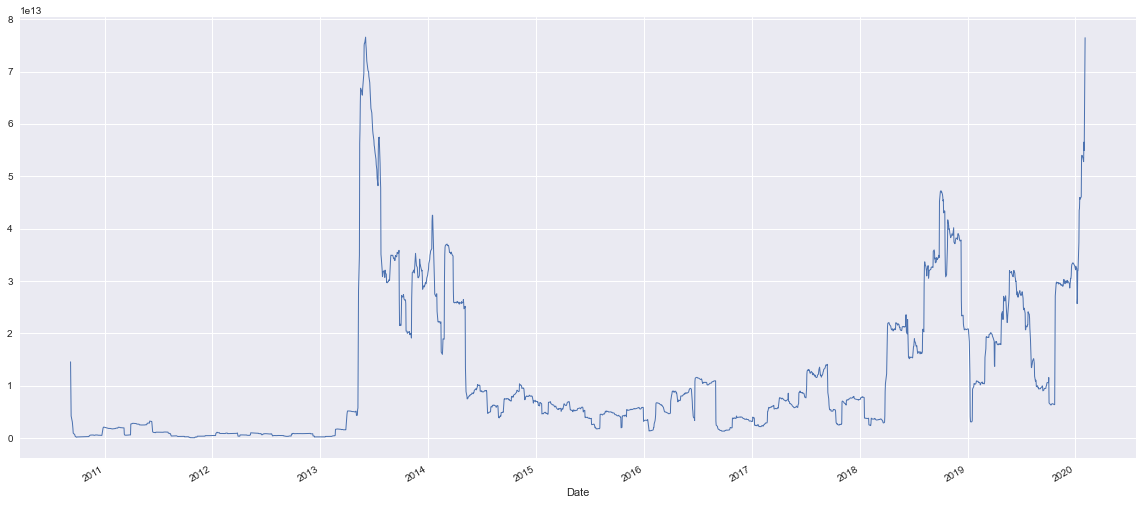

In [7]:
df['Volume'].rolling(50).var().plot()
plt.show()

> <span>&#171;</span>There is no spike of variance of the volumes before the rise<span>&#187;</span>

# Let's check classical indicator
# RSI14 - a trend oscillator

$$ RSI_{14} = 100 - (\frac{100}{1 + RS}) $$ 


$$ RS = Relative Strength = \frac{\text{average of all up moves in the last 14 days}}{\text{average of all down moves in the last 14 days}} = \frac{\text{AvgUP}}{\text{AvgDOWN}} $$

This leading indicator is limited from 0 to 100, when its value is below 30 it is said that it is overbought and when its value is above 70 it is said that it is overbought.

### How to calcul it ?
https://www.macroption.com/rsi-calculation/

https://www.investopedia.com/terms/r/rsi.asp

* Evaluate average_gain and average_loss for the first 14 days
* Caculate average_up and average_down with a recurrent formula

$$AvgUP(t) = \frac{UP(t) + 13 \times AvgUP(t-1)}{14}$$
$$AvgDOWN(t) = \frac{DOWN(t) + 13 \times AvgDOWN(t-1)}{14}$$

In [8]:
# Calculate diff
diff=df.Close.diff().dropna()
# Ups
plus=diff.map(lambda x: x if x>0 else 0).rename('Plus')
# Downs
minus=diff.map(lambda x: -1*x if x<0 else 0).rename('Minus')

rsi14=pd.concat([diff,plus,minus],axis=1)
# init average up
rsi14['AvgUP'] = rsi14.Plus[:14].sum()/14
# init average down
rsi14['AvgDOWN'] = rsi14.Minus[:14].sum()/14

# calculate AvgUP and AvgDown with the recurrent formula
for i in range(14,rsi14.Close.size):
    rsi14['AvgUP'].iloc[i]=(rsi14['Plus'].iloc[i] + 13*rsi14['AvgUP'].iloc[i-1])/14
    rsi14['AvgDOWN'].iloc[i]=(rsi14['Minus'].iloc[i] + 13*rsi14['AvgDOWN'].iloc[i-1])/14

rsi14['RSI']=100 - 100 / (1+rsi14['AvgUP']/rsi14['AvgDOWN'])
rsi14.tail(10)

,Close,Plus,Minus,AvgUP,AvgDOWN,RSI
Date,,,,,,
2020-01-21,36.700012,36.700012,0.000000,10.114034,2.943582,77.456975
2020-01-22,22.359986,22.359986,0.000000,10.988745,2.733326,80.080807
2020-01-23,2.640014,2.640014,0.000000,10.392407,2.538088,80.371300
2020-01-24,-7.380005,0.000000,7.380005,9.650092,2.883939,76.991127
2020-01-27,-6.799987,0.000000,6.799987,8.960800,3.163657,73.906815
2020-01-28,8.880004,8.880004,0.000000,8.955029,2.937682,75.298469
2020-01-29,14.089966,14.089966,0.000000,9.321810,2.727847,77.361620
2020-01-30,59.820008,59.820008,0.000000,12.928824,2.533001,83.617711
2020-01-31,9.760009,9.760009,0.000000,12.702480,2.352072,84.376339


ConversionError: Failed to convert value(s) to axis units: '2019-12-19'

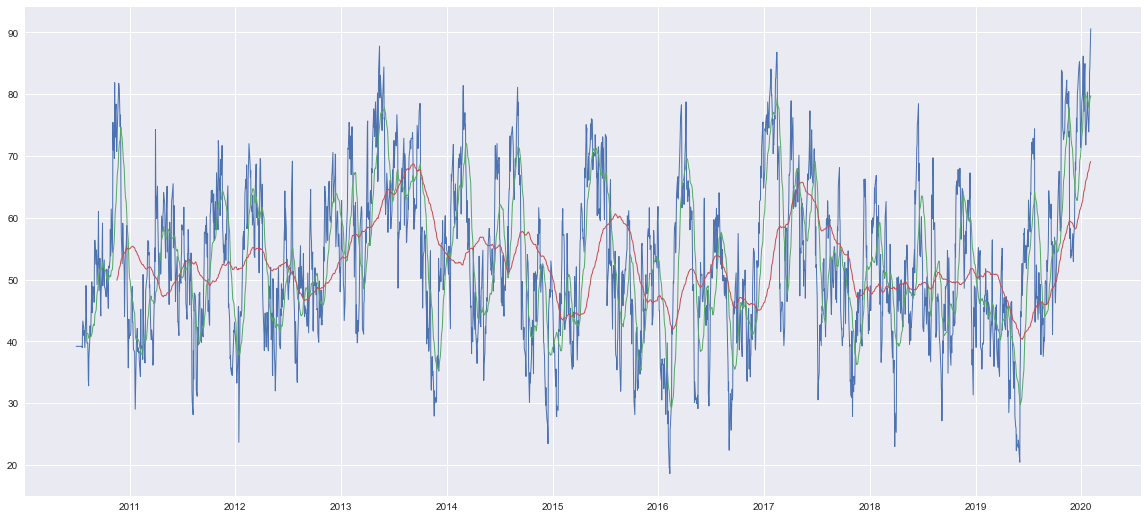

In [9]:
short = rsi14['RSI'].rolling(window=20).mean()
long = rsi14['RSI'].rolling(window=100).mean()
plot_with_rolling(data=rsi14['RSI'],short_rolling=short,long_rolling=long,lbl='Close Price')    

# MACD (Moving Average Convergence-Divergence)
https://www.macroption.com/macd/

https://www.investopedia.com/terms/m/macd.asp

*EMA stands for "exponential moving average"*

* **MACD line = (shorter EMA of close prices) – (longer EMA of close prices)**
* **MACD Signal = EMA of MACD line**

With 

* s = period of the shorter EMA
* l = period of the longer EMA
* p = period of the EMA of MACD

These periods can be equal to (s=12, l=26, p=9) or (s=8, l=22, p=11), for instance


**How to interprete it ?**

| MACD line   | Description |
| ----------- | ----------- |
| positive and rising   | Market’s bullish momentum is accelerating        |
| negative and falling   | Market’s bearish momentum is accelerating        |
| positive but falling   | The bullish momentum in the market is fading        |
| negative but increasing   | The bearish momentum in the market is fading        |
| zero      | Balanced       |

In [ ]:
ema_short = df.Close.ewm(span=12, adjust=False).mean()
ema_long = df.Close.ewm(span=26, adjust=False).mean()
macd_line = ema_short - ema_long
macd_signal = macd_line.ewm(span=9, adjust=False).mean()


In [ ]:
# Plot 
fig, ax = plt.subplots(figsize=(20,9))

ax.plot(macd_line.index, macd_line, label='MACD Line')
ax.plot(macd_signal.index, macd_signal, label='MACD Signal')
ax.axvline(x='2019-12-19',linewidth=0.8, color='r')
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
ax.legend()

plt.show()


# The momentum

https://www.macroption.com/momentum/


Momentum shows how much the closing price has changed, it indicates how much a trend is strong.

Momentum is the difference between current closing price and the closing price n days before

`Momentum = Close(Today) – Close(Today - n days)`

In [ ]:
momentum = df.Close.diff(20)
momentum.plot()
plt.show()

# Let's gather all this


In [ ]:

def plot_all(close=df.Close,rsi=rsi14['RSI'],macd=macd_line,momentum=momentum):
    fig = plt.figure(constrained_layout=True,figsize=(20,16))
    gs = fig.add_gridspec(10, 1)
    ax1 = fig.add_subplot(gs[:4, 0])
    ax1.set_title('Close')
    ax1.plot(close.index, close, label='Close')
    ax1.axvline(x='2019-12-19',linewidth=0.8, color='r')
    ax2 = fig.add_subplot(gs[4:6,0])
    ax2.set_title('RSI14')
    ax2.plot(rsi.index, rsi)
    ax2.axhline(y=30,linewidth=0.5, color='blue')
    ax2.axhline(y=70,linewidth=0.5, color='red')
    ax2.axvline(x='2019-12-19',linewidth=0.8, color='r')
    ax3 = fig.add_subplot(gs[6:8,0])
    ax3.set_title('MACD')    
    ax3.plot(macd.index, macd)
    ax3.axhline(y=0,linewidth=0.5, color='black')
    ax3.axvline(x='2019-12-19',linewidth=0.8, color='r')
    ax4 = fig.add_subplot(gs[8:,0])
    ax4.set_title('Momentum')
    ax4.plot(momentum.index, momentum)
    ax4.axhline(y=0,linewidth=0.5, color='black')
    ax4.axvline(x='2019-12-19',linewidth=0.8, color='r')
    plt.show()
plot_all()


# Zoom on the last year

In [ ]:
startd = '2018-12-31'
plot_all(close=df.Close[df.index>startd],rsi=rsi14['RSI'][rsi14.index>startd],macd=macd_line[macd_line.index>startd],momentum=momentum[momentum.index>startd])

> <span>&#171;</span>My comments ...<span>&#187;</span>

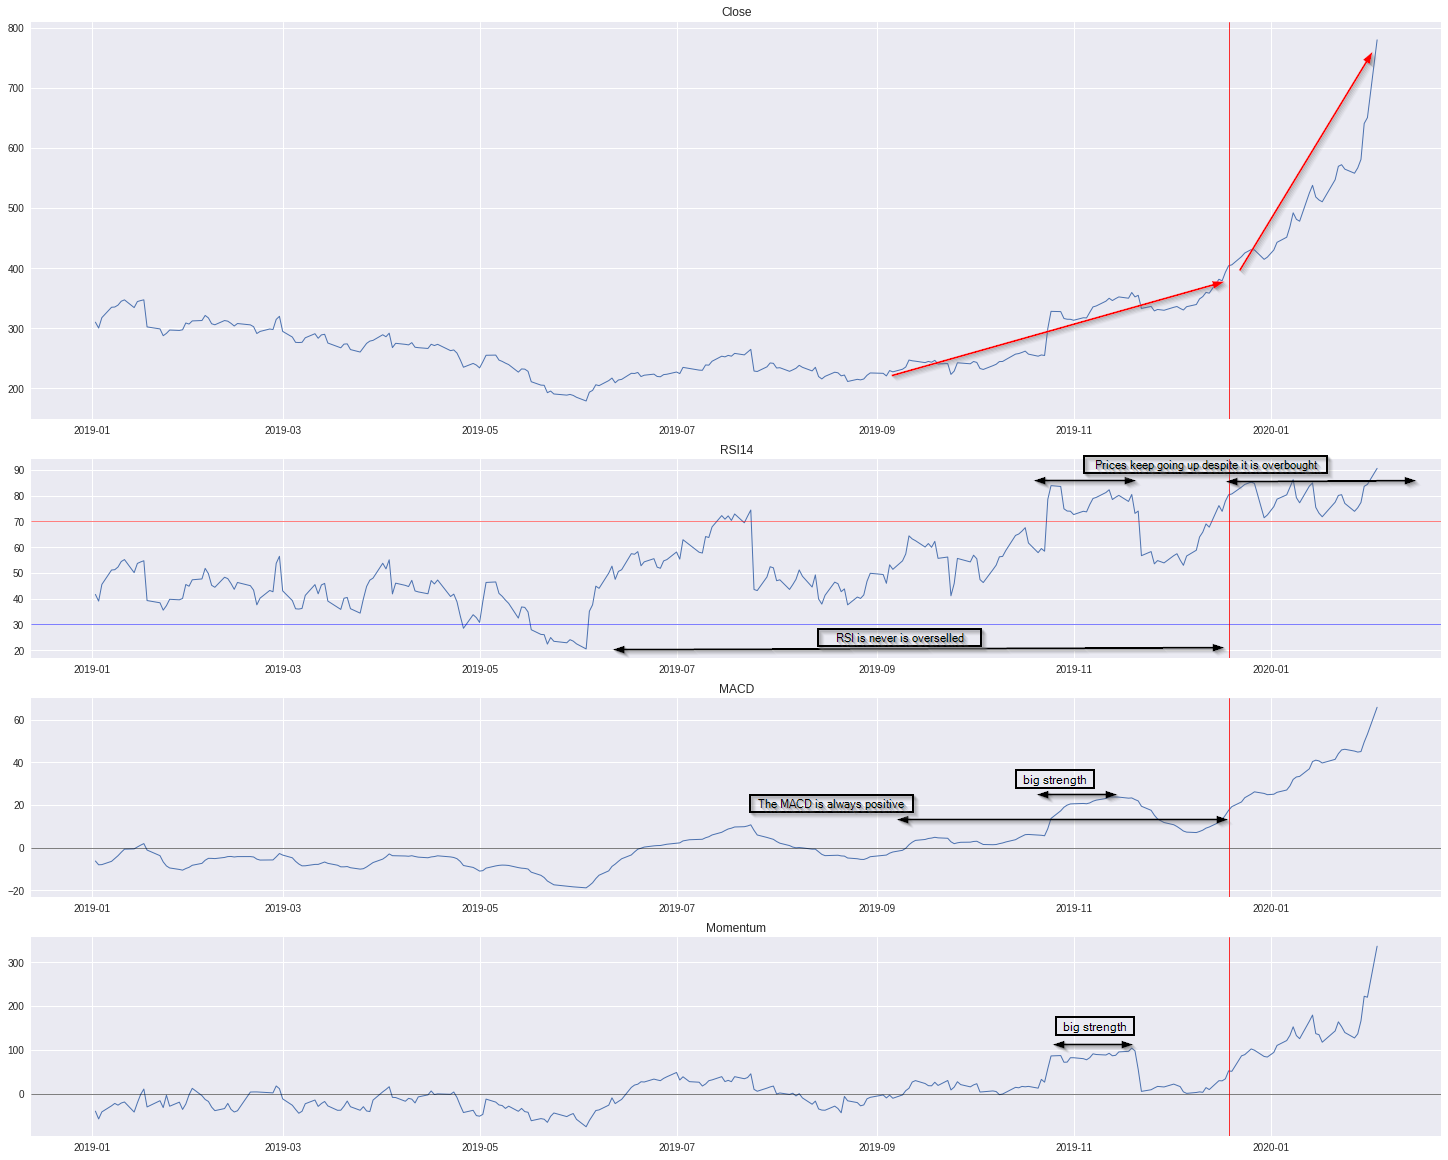

# A risk point of view - distribution of the daily return
> <span>&#171;</span>let's look at risk indicators between 2019-01-01 and the pivotal date  (2019-12-19) <span>&#187;</span>

**A distribution can be descrided by these moments , mean (order=1) , variance (order=2), skewness(order=3) and kurtosis(order=4)**


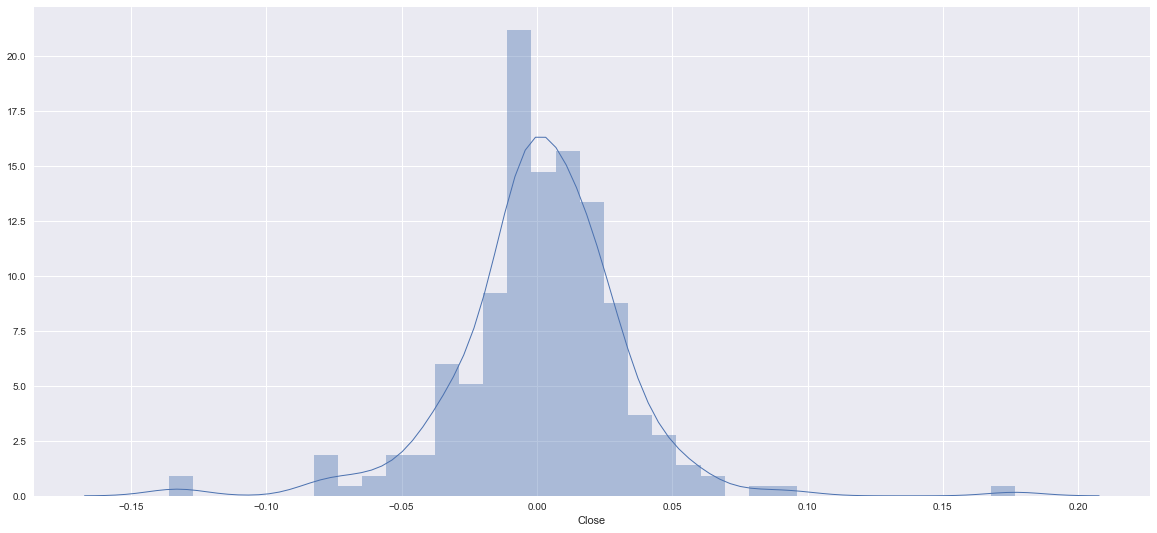

In [10]:
# Calculate the daily return
daily_rtn_all = df.loc[df.index>'2018-12-31','Close']/df.loc[df.index>'2018-12-31','Close'].shift(1) - 1
daily_rtn_all.dropna(inplace=True)
daily_rtn = daily_rtn_all[daily_rtn_all.index<'2019-12-19']
# plot the distribution
import seaborn as sns
sns.distplot(daily_rtn)
plt.show()


**Skewness** is an indicator of the symmetry. A distribution with a long left tail (resp. right tail) has a high probality of observing large negative ( resp. positive) values.


In [11]:
print( 'Skewness (before)  =', daily_rtn.skew())
print( 'Skewness (overall) =', daily_rtn_all.skew())

Skewness (before)  = -0.027262250217438392
Skewness (overall) = 0.73986547737841


> <span>&#171;</span>The skewness of daily return before (2019-12-19) is closed to zero, so there is no sign that of high probability to see large positive values <br> After the skewness is positive and > 0.5 so we can just see the rise<span>&#187;</span>

**Kurtosis** describes the degree of flatness, with fat tails (high risk) or thin tail (low risk) : threshold is 3 ( < 3 => thin , > 3 => fat)

In [12]:
print( 'Kurtosis (before)  =', daily_rtn.kurt())
print( 'Kurtosis (overall) =', daily_rtn_all.kurt())

Kurtosis (before)  = 6.481094543976291
Kurtosis (overall) = 7.833891593843914


> <span>&#9757;</span> <span>&#171;</span>The kurtosis is very large, the distribution is called leptokurtic, indicating a higher probality of extreme movement<span>&#187;</span>

**Value at risk** summarizes the worst loss over a target horizon that will not be exceeded with a given level of confidence

A first estimation of the value at risk can done by looking at the historical values.

We can look at the mirror value of the value at risk in order to evaluate the "risk" of high return

In [13]:
print( 'Before 2019-12-19')
print( 'Historical VaR at 1 days at 95%  =', daily_rtn.sort_values().quantile(0.05))
print( 'Historical Mirror VaR at 1 days at 5%  =', daily_rtn.sort_values().quantile(0.95))
print( 'Overall')
print( 'Historical VaR at 1 days at 95%  =', daily_rtn_all.sort_values().quantile(0.05))
print( 'Historical Mirror VaR at 1 days at 5%  =', daily_rtn_all.sort_values().quantile(0.95))

Before 2019-12-19
Historical VaR at 1 days at 95%  = -0.047815940173357045
Historical Mirror VaR at 1 days at 5%  = 0.04461081730414265
Overall
Historical VaR at 1 days at 95%  = -0.041982090408408966
Historical Mirror VaR at 1 days at 5%  = 0.048198579909954783


> <span>&#171;</span>At 1 days, there  is 5% of probability that the return exceeds 4.46 % before 2019-12-19<span>&#187;</span>

# A risk point of view - Simulating the daily return

> <span>&#171;</span>We can generate trajectories of daily return with a geometric brownian motion.<br>
From these trajectories (sorted), we can extract quantiles (5%,95%) that correspond to the VAR and its mirror value. 
<span>&#187;</span>

Geometric Brownian Motion is $ P_{t+1} = P_{t} \times (1 + \mu \Delta_t + \sigma \sqrt{ \Delta_t } \epsilon) $ with
* $P_{t}$ is Price at time t
* $\mu$ is mean of daily returns
* $\sigma$ is standard deviation of daily returns
* $\Delta_t$ is 1 (1 day)
* $\epsilon$ follows N(0,1)

by the way $ P_{n} = P_{0} \times \prod_{k=1}^n{(1 + \mu \Delta_t + \sigma \sqrt{ \Delta_t } \epsilon_i)}  $

if we speak about return 

$ R_{n} = \frac{P_{n} - P_{0}}{P_{0}}$

$ R_{n} = \prod_{k=1}^n{(1 - \mu \Delta_t + \sigma \sqrt{ \Delta_t } \epsilon_i)} -1 $


## <span>&#171;</span>Let's try this<span>&#187;</span> Simulating VaR with a horizon of h days 


In [14]:
horizon = 20
nbr_simulation = 10000

std = np.std(daily_rtn)
mean = np.mean(daily_rtn)

gen=1 + mean + std * np.random.randn(nbr_simulation,horizon) 
gen = np.prod(gen,axis=1)-1
gen.sort()

In [15]:
print('Mean of daily return = {}'.format(mean))
print('Standard deviation of daily return = {}'.format(std))
print( 'VaR at {} days at 95%  = {}'.format(horizon,np.quantile(gen, 0.05)))
print( 'Mirror VaR at {} days at 95%  = {}'.format(horizon,np.quantile(gen, 0.95)))

Mean of daily return = 0.0014595898198870962
Standard deviation of daily return = 0.031025192456952694
VaR at 20 days at 95%  = -0.19267533942637685
Mirror VaR at 20 days at 95%  = 0.2807527750496477


* > <span>&#9757;</span> <span>&#171;</span>The VaR is very large, indicating a higher probality of extreme movement<span>&#187;</span>

# For fun... Let's simulated the stock prices with a RNN
<span>&#171;</span>I don't know why, LTSM only entertains me around me<span>&#187;</span>

The train interval is [01/01/2018 - 12/19/2019[

The test interval is [12/19/2019 - End]


In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
import math

# Window size = number of previous values to predict the next value
WINDOW_SIZE = 10

###  Normalization

In [17]:
close_price = df.Close[(df.index>'2017-12-31')]
close_price['2019-12-19']


404.040009

In [18]:
train_close = df.Close[(df.index>'2017-12-31') & (df.index<'2019-12-23')].values.reshape(-1, 1)
all_close = df.Close[df.index>'2017-12-31'].values.reshape(-1, 1)
#  MinMaxScaler
scaler = MinMaxScaler()
scaled_all_close = scaler.fit_transform(all_close)
scaled_train_close = scaler.transform(train_close)                     
#scaled_close = scaled_close[~np.isnan(scaled_close)]
#scaled_close = scaled_close.reshape(-1, 1)
print("Train shape = {}".format(scaled_train_close.shape))
print("All shape = {}".format(scaled_all_close.shape))
print("nan values ? {}".format(np.isnan(scaled_train_close).any()))

Train shape = (497, 1)
All shape = (525, 1)
nan values ? False


### Generate sequences

In [19]:
# Generate sequences of lenght = WINDOW_SIZE

def generateSequence(sequence,backward):
    X, y = list(), list()
    for i in range(sequence.shape[0]-backward):
        seq_x, seq_y = sequence[i:i+backward], sequence[i+backward]
        X.append(seq_x)
        y.append(seq_y)
    X=np.array(X)
    y=np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X,y
    
X,y = generateSequence(scaled_train_close,WINDOW_SIZE)
print("X shape = {}".format(X.shape))
print("y shape = {}".format(y.shape))

X shape = (487, 10, 1)
y shape = (487, 1)


### Build the model

In [20]:
model = Sequential()
model.add(LSTM(12, activation='relu', input_shape=(WINDOW_SIZE, 1)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

###  Training

In [21]:
#  Compile
model.compile(
    loss='mse', 
    optimizer='adam'
)

BATCH_SIZE = 64

#  Compile
history = model.fit(
    X, 
    y, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)


Train on 438 samples, validate on 49 samples
Epoch 1/50
438/438 [==============================] - 3s 6ms/sample - loss: 0.0314 - val_loss: 0.0478
Epoch 2/50
438/438 [==============================] - 0s 125us/sample - loss: 0.0250 - val_loss: 0.0393
Epoch 3/50
438/438 [==============================] - 0s 125us/sample - loss: 0.0195 - val_loss: 0.0316
Epoch 4/50
438/438 [==============================] - 0s 150us/sample - loss: 0.0150 - val_loss: 0.0251
Epoch 5/50
438/438 [==============================] - 0s 122us/sample - loss: 0.0113 - val_loss: 0.0194
Epoch 6/50
438/438 [==============================] - 0s 107us/sample - loss: 0.0084 - val_loss: 0.0148
Epoch 7/50
438/438 [==============================] - 0s 187us/sample - loss: 0.0063 - val_loss: 0.0111
Epoch 8/50
438/438 [==============================] - 0s 162us/sample - loss: 0.0048 - val_loss: 0.0084
Epoch 9/50
438/438 [==============================] - 0s 141us/sample - loss: 0.0039 - val_loss: 0.0065
Epoch 10/50
438/438 [

487/487 [==============================] - 0s 76us/sample - loss: 6.6700e-04
Train Score: 0.000667 MSE (0.025826 RMSE)


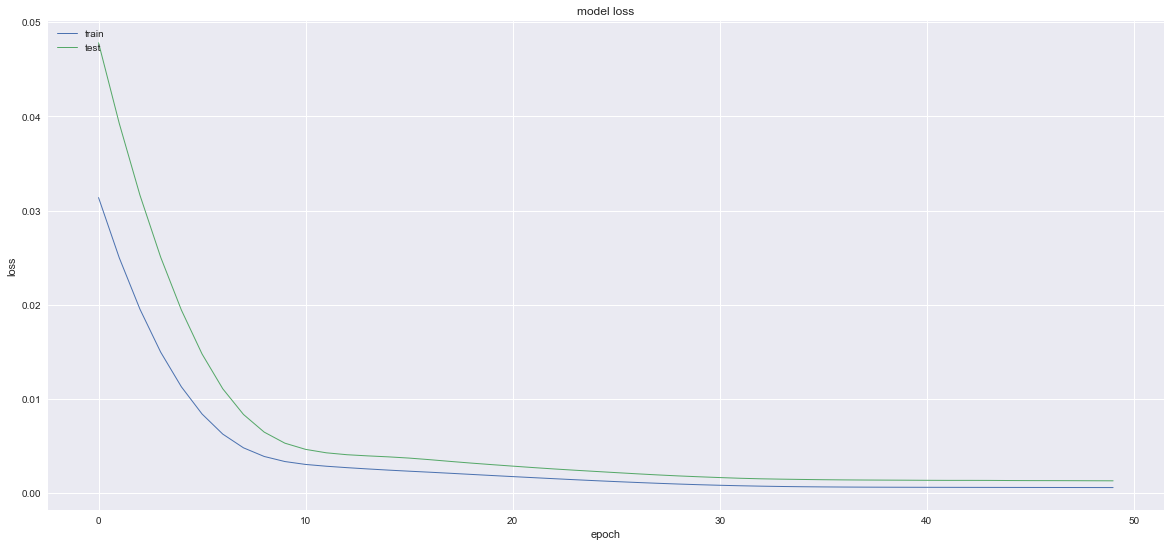

In [22]:
trainScore = model.evaluate(X, y)
print('Train Score: %.6f MSE (%.6f RMSE)' % (trainScore, math.sqrt(trainScore)))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

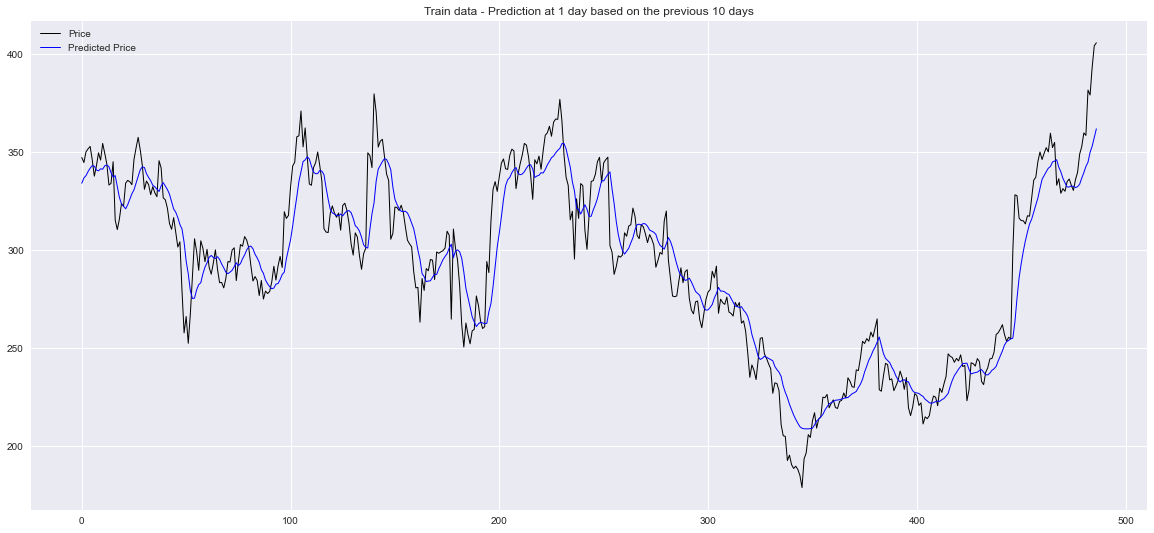

In [23]:
y_train_predicted = model.predict(X)
y_inverse = scaler.inverse_transform(y)
y_train_predicted_inverse = scaler.inverse_transform(y_train_predicted)


plt.plot(y_inverse.ravel(), label="Price", color='black')
plt.plot(y_train_predicted_inverse.ravel(), label="Predicted Price", color='blue')
plt.legend(loc='upper left')
plt.title("Train data - Prediction at 1 day based on the previous {} days".format(WINDOW_SIZE))
plt.show()

## Prediction for all the data (including > 19-12-2019)


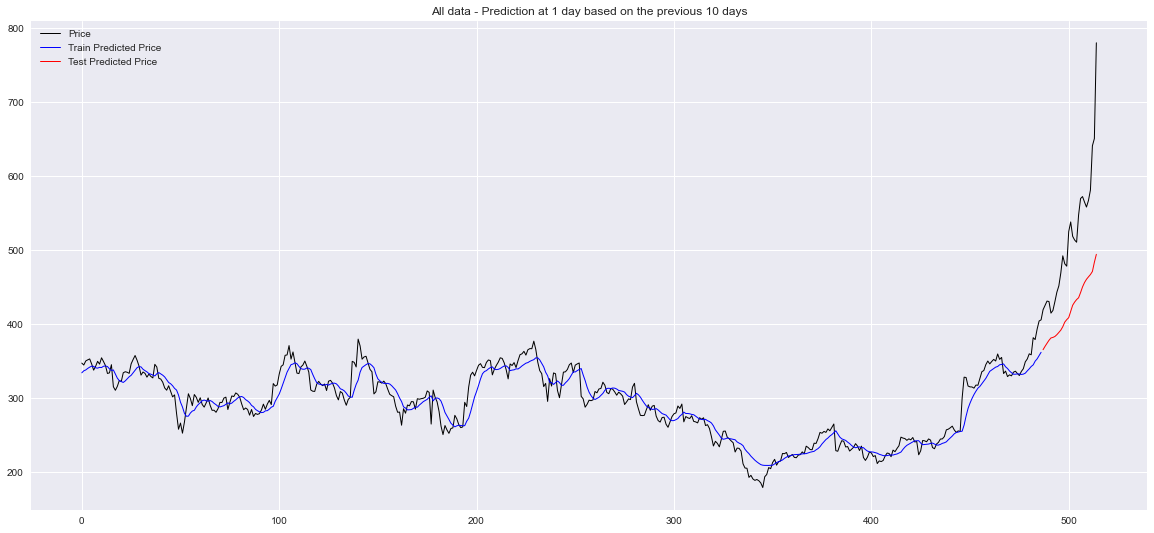

In [24]:
X,y = generateSequence(scaled_all_close,WINDOW_SIZE)

y_predicted = model.predict(X)
y_inverse = scaler.inverse_transform(y)
y_predicted_inverse = scaler.inverse_transform(y_predicted)


plt.plot(y_inverse.ravel(), label="Price", color='black')
plt.plot(pd.Series(y_predicted_inverse[:487].ravel(),index=range(0,487)), label="Train Predicted Price", color='blue')
plt.plot(pd.Series(y_predicted_inverse[487:].ravel(),index=range(487,515)), label="Test Predicted Price", color='red')

plt.legend(loc='upper left')
plt.title("All data - Prediction at 1 day based on the previous {} days".format(WINDOW_SIZE))
plt.show()